In [1]:
from src.tools import *
from src.main import *

In [2]:
massmodels = import_massmodel_data(filepath='./sparc/MassModels_Lelli2016c.mrt')
mm_dict = {mm['ID']: massmodels[massmodels['ID'] == mm['ID']] for mm in massmodels}
metadata, refs = import_galaxy_sample_data(filepath='./sparc/SPARC_Lelli2016c.mrt')

In [3]:
gal_id = 'UGCA442'
n_rows = 27
#gal_id = 'CamB'
#n_rows = 24

In [4]:
# Print the overview for this galaxy
print('\t'.join(metadata[gal_id].dtype.names))
print('\t'.join([str(item) if name != 'T' else str(hubble_types[item]) for item,name in zip(metadata[gal_id],metadata[gal_id].dtype.names)]))
print(refs[metadata[gal_id]['Ref']])

ID	T	D	e_D	f_D	Inc	e_Inc	L	e_L	Reff	SBeff	Rdisk	SBdisk	MHI	RHI	Vflat	e_Vflat	Q	Ref
UGCA442	Sm	4.35	0.22	2	64.0	7.0	0.14	0.005	1.71	7.6	1.18	116.1	0.263	4.37	56.4	2.1	1	Co00
Cote, S. et al. 2000, AJ, 120, 3027


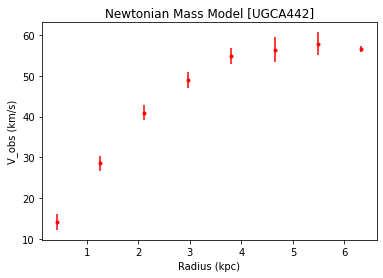

D	R	Vobs	e_Vobs	Vgas	Vdisk	Vbul	SBdisk	SBbul
 4.35	 0.42	14.20	 1.91	 4.87	 4.78	 0.00	11.05	 0.00
 4.35	 1.26	28.60	 1.82	13.14	10.76	 0.00	 5.81	 0.00
 4.35	 2.11	41.00	 1.74	19.65	13.60	 0.00	 2.75	 0.00
 4.35	 2.96	49.00	 1.91	22.42	13.29	 0.00	 1.00	 0.00
 4.35	 3.79	54.80	 2.05	22.82	12.56	 0.00	 0.72	 0.00
 4.35	 4.65	56.40	 3.12	21.37	12.33	 0.00	 0.43	 0.00
 4.35	 5.48	57.80	 2.83	18.73	12.04	 0.00	 0.18	 0.00
 4.35	 6.33	56.50	 0.65	16.75	10.62	 0.00	 0.00	 0.00


In [5]:
plot_single_galaxy_mm(massmodels,gal_id)

# Print the raw data for this galaxy as well
labels = mm_dict[gal_id].dtype.names[1:]
print('\t'.join(labels))
for mm_line in mm_dict[gal_id]:
    print_arr = ['{:>5.2f}'.format(arr_item) for arr_item in [item for item in mm_line][1:]]
    print('\t'.join(print_arr))

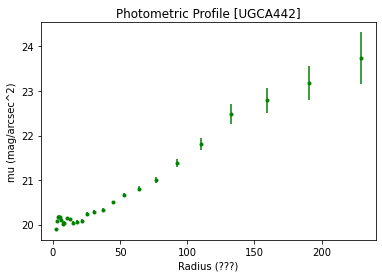

Photometric Data
Radius    mu        Kill      Error   
    2.40    19.906     False     0.025
    2.88    20.077      True     0.029
    3.46    20.173      True     0.031
    4.15    20.175      True     0.031
    4.98    20.160      True     0.031
    5.97    20.109      True     0.036
    7.17    20.015      True     0.040
    8.60    20.040      True     0.036
   10.32    20.146      True     0.031
   12.38    20.117      True     0.037
   14.86    20.047      True     0.040
   17.83    20.057      True     0.049
   21.40    20.077      True     0.049
   25.68    20.246      True     0.039
   30.81    20.293      True     0.037
   36.98    20.325      True     0.038
   44.37    20.497      True     0.041
   53.25    20.671      True     0.048
   63.90    20.809      True     0.054
   76.68    20.994      True     0.065
   92.01    21.380      True     0.094
  110.41    21.810      True     0.132
  132.49    22.486      True     0.222
  158.99    22.791      True     0.283
  190.79

In [10]:
photo_data = import_photometric_profile(datapath='./sparc/sfb_LTG/',gal_ID=gal_id,num_rows=n_rows)

plot_single_galaxy_photo_profile(photo_data, gal_id)

# Print the raw photometric data for this galaxy
photo_labels = photo_data.dtype.names
print('Photometric Data')
print('  '.join(['{:<8}'.format(item) for item in photo_labels]))
for photo_line in photo_data:
    photo_line_zip = zip([item for item in photo_line],photo_labels)
    photo_print_arr = ['{:>8}'.format(str(item)) if name == 'Kill' else '{:>8.2f}'.format(item) if name == 'Radius' else '{:>8.3f}'.format(item) for item,name in photo_line_zip]
    print('  '.join(photo_print_arr))

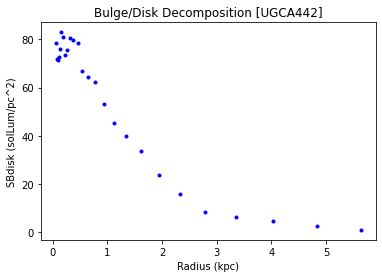


Bulge/Disk Decompositions
Radius     SBdisk     SBbulge  
  0.06074   78.34838    0.00000
  0.07297   71.71831    0.00000
  0.08752   71.58632    0.00000
  0.10503   72.58218    0.00000
  0.12590   76.07291    0.00000
  0.15121   82.95260    0.00000
  0.18137   81.06437    0.00000
  0.21764   73.52415    0.00000
  0.26109   75.51444    0.00000
  0.31339   80.54341    0.00000
  0.37602   79.80499    0.00000
  0.45131   78.34838    0.00000
  0.54158   67.05482    0.00000
  0.64976   64.21404    0.00000
  0.77989   62.34908    0.00000
  0.93574   53.21451    0.00000
  1.12301   45.33462    0.00000
  1.34761   39.92363    0.00000
  1.61713   33.66899    0.00000
  1.94044   23.59555    0.00000
  2.32848   15.87925    0.00000
  2.79413    8.51981    0.00000
  3.35300    6.43324    0.00000
  4.02365    4.53346    0.00000
  4.82842    2.68429    0.00000
  5.63319    0.99147    0.00000


In [9]:
decomp_data = import_bulge_disk_decomps(datapath='./sparc/BulgeDiskDec_LTG/',gal_ID=gal_id,num_rows=n_rows)

plot_single_galaxy_decomp(decomp_data, gal_id)

# Print the bulge/disk decompositions for this galaxy
dec_labels = decomp_data.dtype.names
print('\nBulge/Disk Decompositions')
print('  '.join(['{:<9}'.format(item) for item in dec_labels]))
for dec_line in decomp_data:
    dec_line_zip = zip([item for item in dec_line],dec_labels)
    dec_print_arr = ['{:>9.5f}'.format(item) for item,name in dec_line_zip]
    print('  '.join(dec_print_arr))